# K Nearest Neighbors com Python

Imagine que você recebeu um conjunto de dados classificados de uma empresa. Eles ocultaram a coluna de parâmetros, mas lhe deram os dados e a classe de destino.

Vamos tentar usar o KNN para criar um modelo que possa predizer diretamente a classe para um novo ponto de dados baseado nas features no dataset.

Vamos lá!

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obter dados

Defina index_col = 0 para usar a primeira coluna como índice.

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


## Normalizar as variáveis

Como o classificador KNN prediz a classe de uma determinada observação ao identificar as observações mais próximas, a escala da variável é importante. Todas as variáveis que estão em grande escala terão um efeito muito maior na distância entre as observações e, portanto, sobre o classificador KNN, do que as variáveis em pequena escala.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Divisão treino-teste

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Usando o KNN

Lembre-se de que estamos tentando encontrar um modelo para prever se alguém estará na TARGET CLASS ou não. Começaremos com k = 1

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
pred = knn.predict(X_test)

## Previsões e avaliações

Vamos avaliar o nosso modelo KNN!

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       148
           1       0.92      0.92      0.92       152

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [18]:
print(confusion_matrix(y_test,pred))

[[136  12]
 [ 12 140]]


# Escolhendo um valor K

Vamos em frente e usar o método do cotovelo para escolher um bom Valor K:

In [19]:
error_rate = []

# Levará algum tempo
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

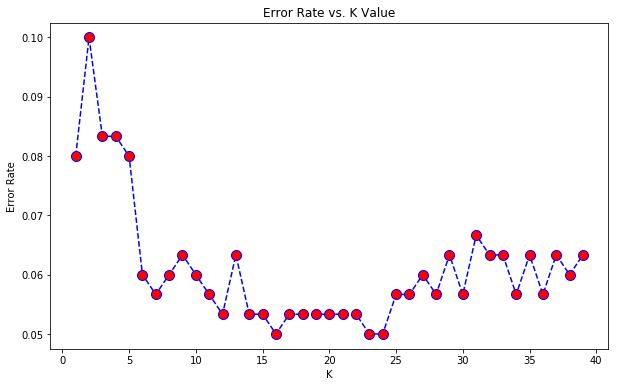

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Aqui podemos ver que, após cerca de K > 23, a taxa de erro tende a girar em torno de 0,06-0,05. Vamos treinar novamente o modelo com isso e verificar o relatório de classificação!

In [21]:
# PRIMEIRA COMPARAÇÃO RÁPIDA PARA O NOSSO ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[136  12]
 [ 12 140]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       148
           1       0.92      0.92      0.92       152

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [22]:
# Agora com K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[140   8]
 [  7 145]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       148
           1       0.95      0.95      0.95       152

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Conseguimos extrair mais algum desempenho do nosso modelo, ajustando-nos para um melhor valor K!